In [1]:
# Import data science packages
import pandas as pd
import numpy as np
import datetime
import re
# Import visualization and geoanalytics packages
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import box
import pyproj

In [6]:
# Import steet centerline geometry with Geopandas
st_df = gpd.read_file('coords.geojson')

In [7]:
st_df

,asset_type,belongs_to,curb_id,distance_end_meters,distance_start_meters,last_edited,asset_subtype,distance_meters,image_url,geometry
0,Curb Cut,original,bGE6MTI0,2.05,0.11,2018-01-16T20:58:10,None,NaN,None,"LINESTRING (-118.24872 34.05555, -118.24870 34..."
1,Curb Paint,original,bGE6MTI0,44.53,6.19,2018-01-16T20:58:10,Red,NaN,None,"LINESTRING (-118.24867 34.05551, -118.24834 34..."
2,Curb Paint,original,bGE6MTI0,53.98,51.72,2018-01-16T20:58:10,Red,NaN,None,"LINESTRING (-118.24828 34.05526, -118.24826 34..."
3,Curb Paint,original,bGE6MTI0,70.26,68.04,2018-01-16T20:58:10,Red,NaN,None,"LINESTRING (-118.24813 34.05517, -118.24811 34..."
4,Curb Paint,original,bGE6MTI0,98.98,83.41,2018-01-16T20:58:10,Red,NaN,None,"LINESTRING (-118.24800 34.05510, -118.24786 34..."
...,...,...,...,...,...,...,...,...,...,...
10184,Parking Sign,original,bGE6MTY5NTIx,NaN,NaN,2018-01-17T15:38:16,None,124.88,https://api.coord.co/surveyor/photo/269661,POINT (-118.25157 34.04253)
10185,Parking Sign,original,bGE6MTY5NTIx,NaN,NaN,2018-01-17T15:38:16,None,149.30,https://api.coord.co/surveyor/photo/261550,POINT (-118.25177 34.04238)
10186,Parking Sign,original,bGE6MTY5NTIx,NaN,NaN,2018-01-17T15:38:16,None,163.04,https://api.coord.co/surveyor/photo/259555,POINT (-118.25188 34.04230)
10187,Parking Sign,original,bGE6MTY5NTIx,NaN,NaN,2018-01-17T15:38:16,None,185.79,https://api.coord.co/surveyor/photo/273722,POINT (-118.25206 34.04217)


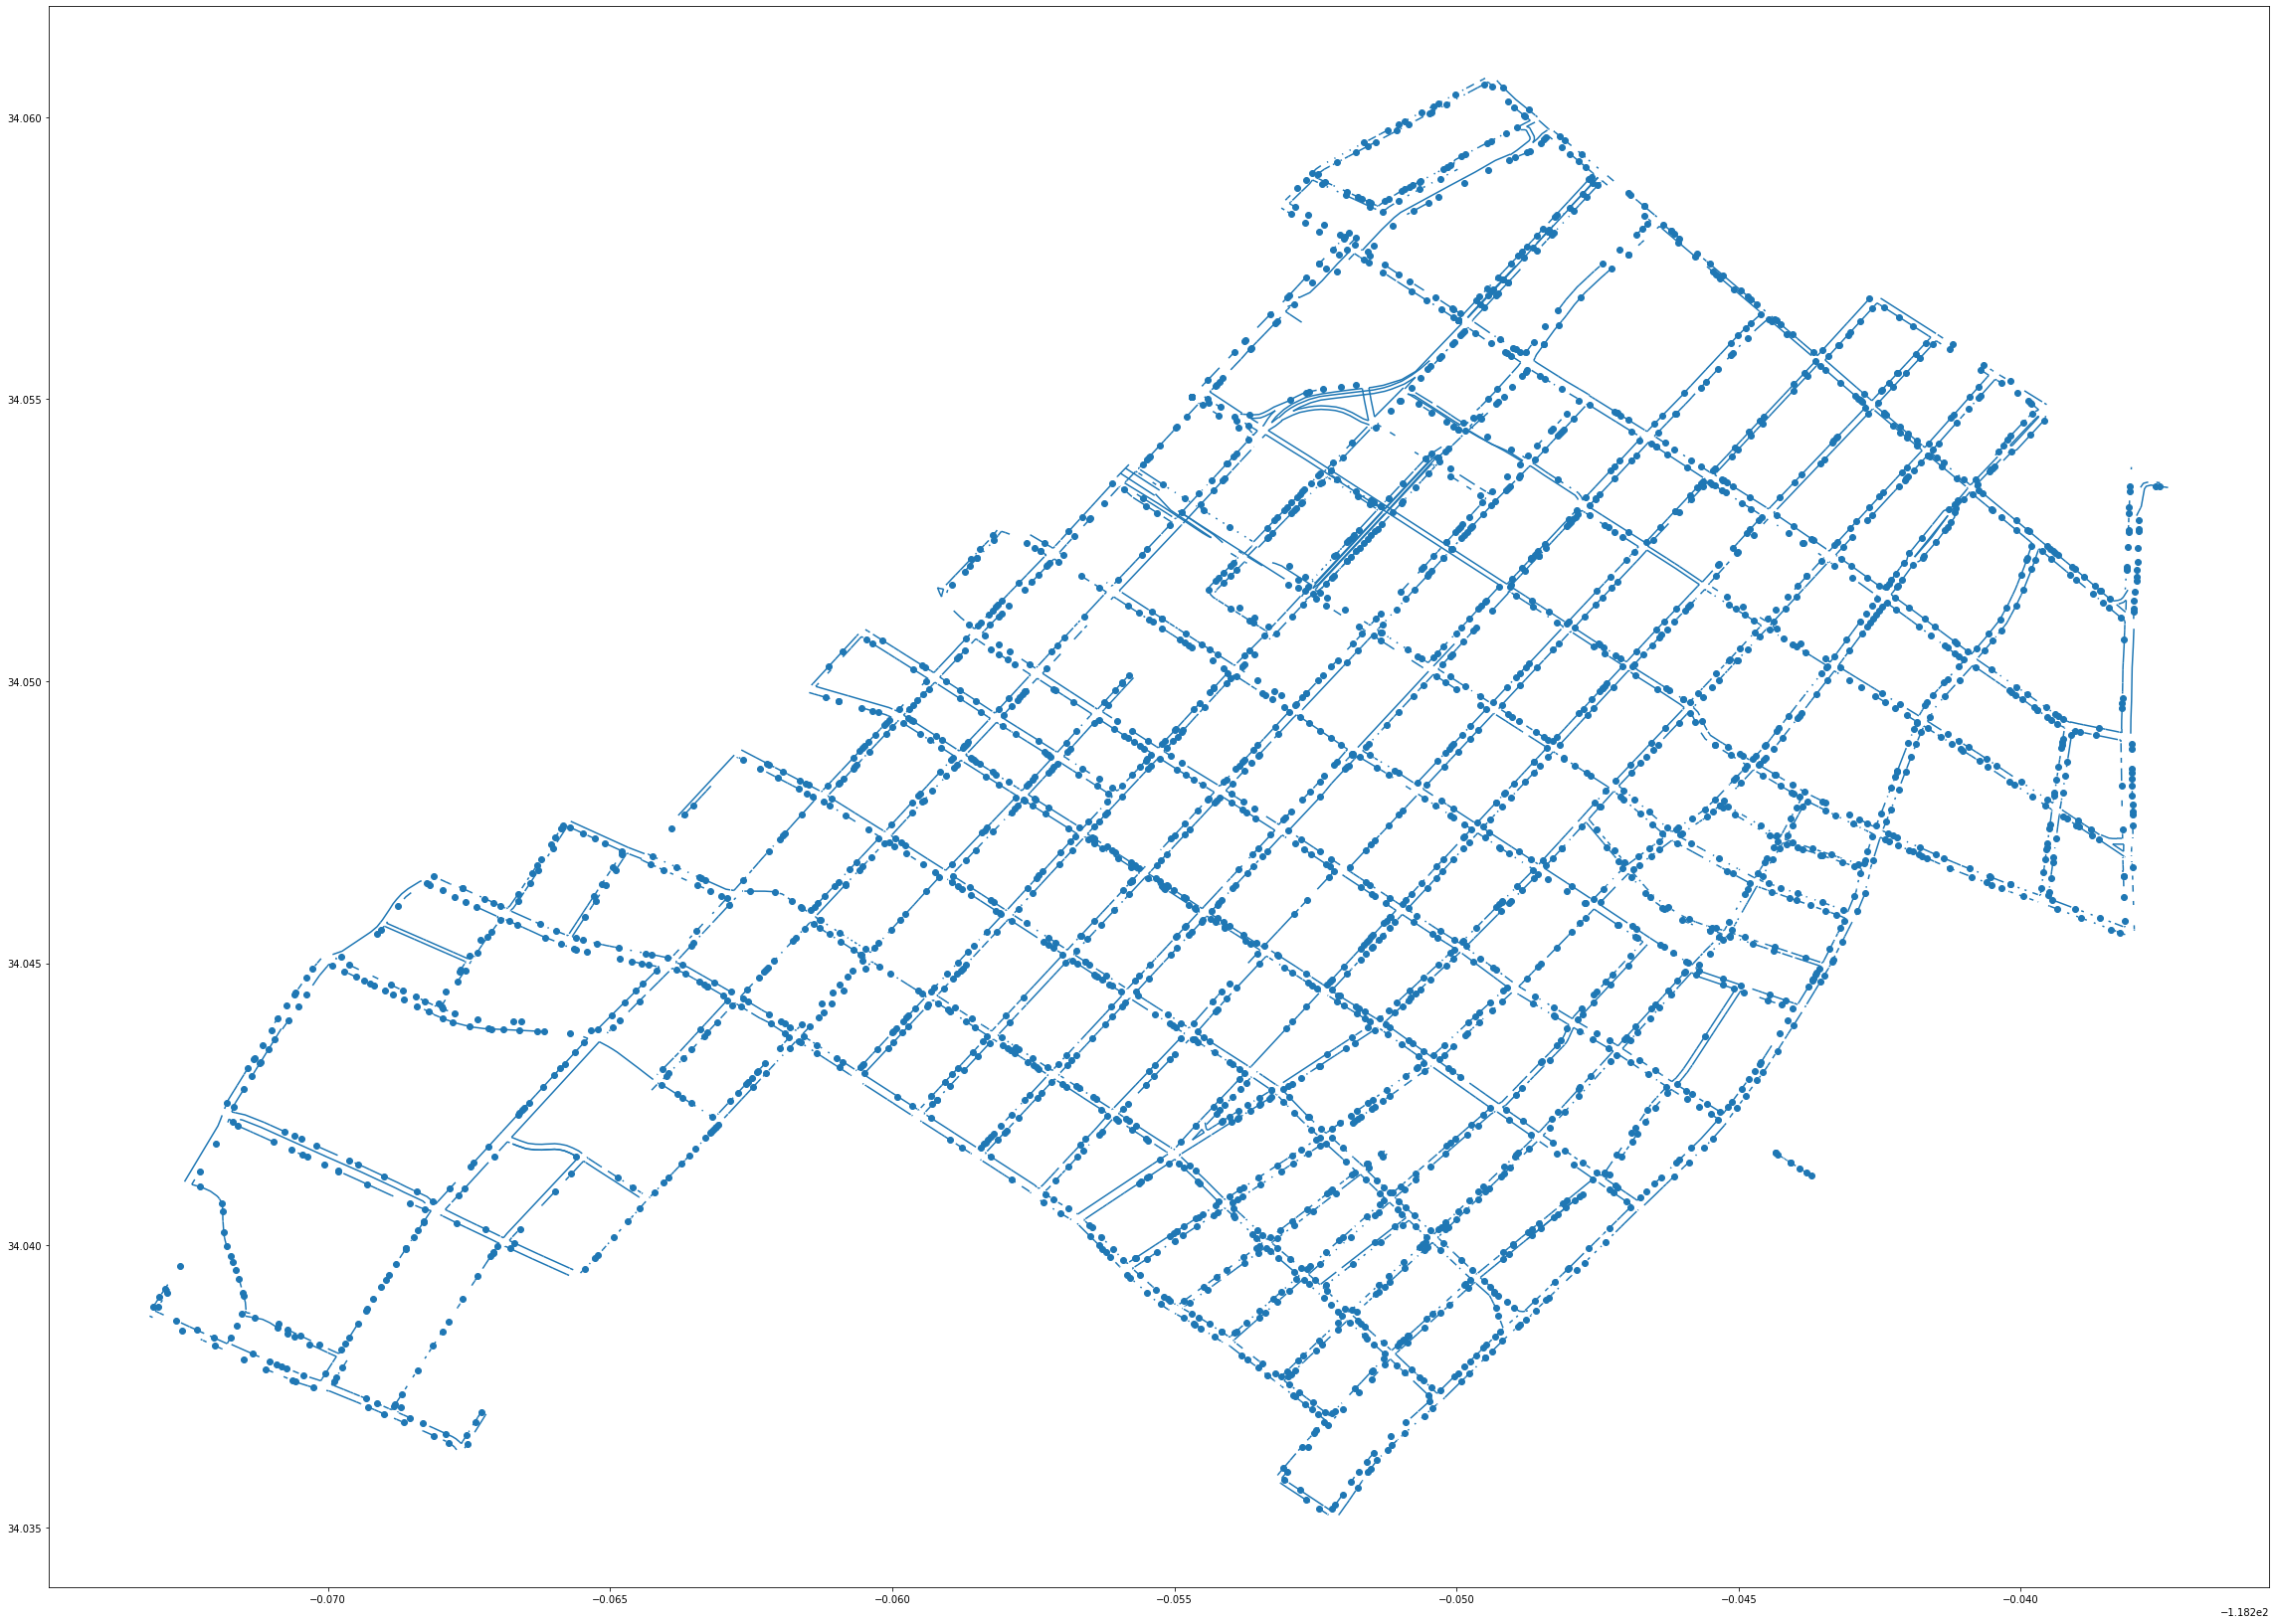

In [10]:
st_df.plot(figsize=(40,40))
plt.show()

In [13]:
# Function to plot points
def plot_points(latitude, longitude, zoom=0.06, column='asset_type', fsize=20, markersize=10):
    ''' Plots citation data points with streets centered on latitude and longitude.
        
    '''
    bbox = box(longitude - zoom, latitude - zoom,longitude
            + zoom, latitude + zoom)
    f, ax = plt.subplots(1, figsize=(fsize,fsize))
    ax.set_aspect('equal')
    st_df[st_df.geometry.within(bbox)].plot(ax=ax, column=column, zorder=1)
    return plt.show()

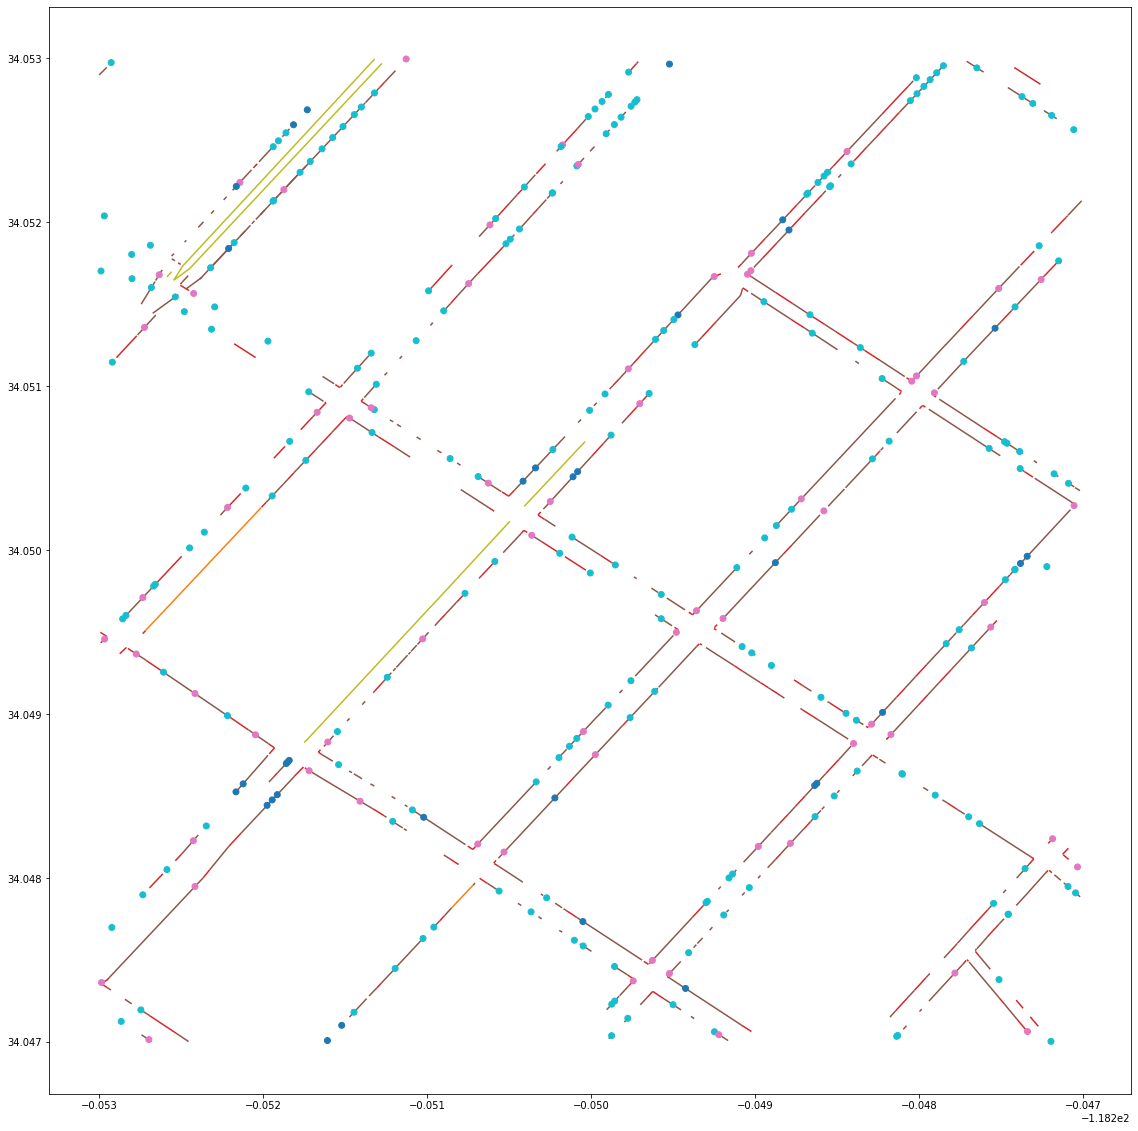

In [21]:
plot_points(34.05, -118.25, zoom= 0.003)